**Abstract:**

This project undertakes a comprehensive analysis of sales data from a superstore. The dataset encompasses various attributes such as shipping mode, customer segment, location (city, state, region), product category, sales, quantity, discount, and profit. The primary objective is to gain insights into the performance metrics of the superstore, focusing on profitability across different dimensions like product categories, regions, and cities. The analysis employs a combination of data visualization tools from the ggplot2 package and SQL queries using the sqldf package.

In [19]:
install.packages('shiny')

install.packages("sqldf") # SQL

install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plogr’, ‘gsubfn’, ‘proto’, ‘RSQLite’, ‘chron’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [20]:
library(tidyverse) # metapackage of all tidyverse packages
library(shiny)
library(sqldf)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: gsubfn

Loading required package: proto

Warning message:
“no DISPLAY variable so Tk is not available”
Loading required package: RSQLite



Google Drive file ID :  12HxcS_ZyrKGBLr4MfsiqkYHy0P4TfzKL

In [21]:
system("gdown --id 12HxcS_ZyrKGBLr4MfsiqkYHy0P4TfzKL")

In [22]:
# importing data
superstore = read.csv("SampleSuperstore.csv")

In [23]:
head(superstore)

,Ship.Mode,Segment,Country,City,State,Postal.Code,Region,Category,Sub.Category,Sales,Quantity,Discount,Profit
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
2,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
3,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
5,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694


In [24]:
# inspecting and cleaning Data

names(superstore)

[1] "Ship.Mode"    "Segment"      "Country"      "City"         "State"       
 [6] "Postal.Code"  "Region"       "Category"     "Sub.Category" "Sales"       
[11] "Quantity"     "Discount"     "Profit"

In [25]:
superstore <- rename(superstore, "SubCategory" = "Sub.Category")

In [26]:
superstore <- rename(superstore, "ShipMode" = "Ship.Mode")

In [27]:
summary(superstore)

   ShipMode           Segment            Country              City          
 Length:9994        Length:9994        Length:9994        Length:9994       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
    State            Postal.Code       Region            Category        
 Length:9994        Min.   : 1040   Length:9994        Length:9994       
 Class :character   1st Qu.:23223   Class :character   Class :character  
 Mode  :character   Median :56430   Mode  :character   Mode  :character  
                    Mean   :55190                                        
                    3rd Qu.:90008                                        
                 

In [28]:
superstore

ShipMode,Segment,Country,City,State,Postal.Code,Region,Category,SubCategory,Sales,Quantity,Discount,Profit
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825


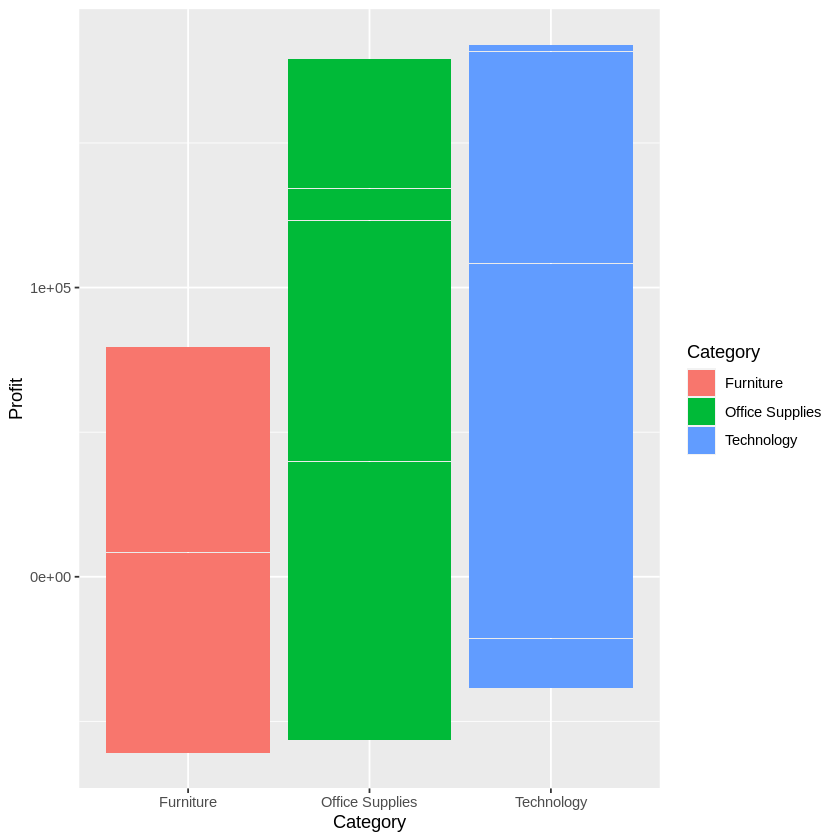

In [29]:
# Preliminary Analysis

ggplot(superstore) + geom_col(mapping = aes(x = Category, y = Profit, fill = Category))

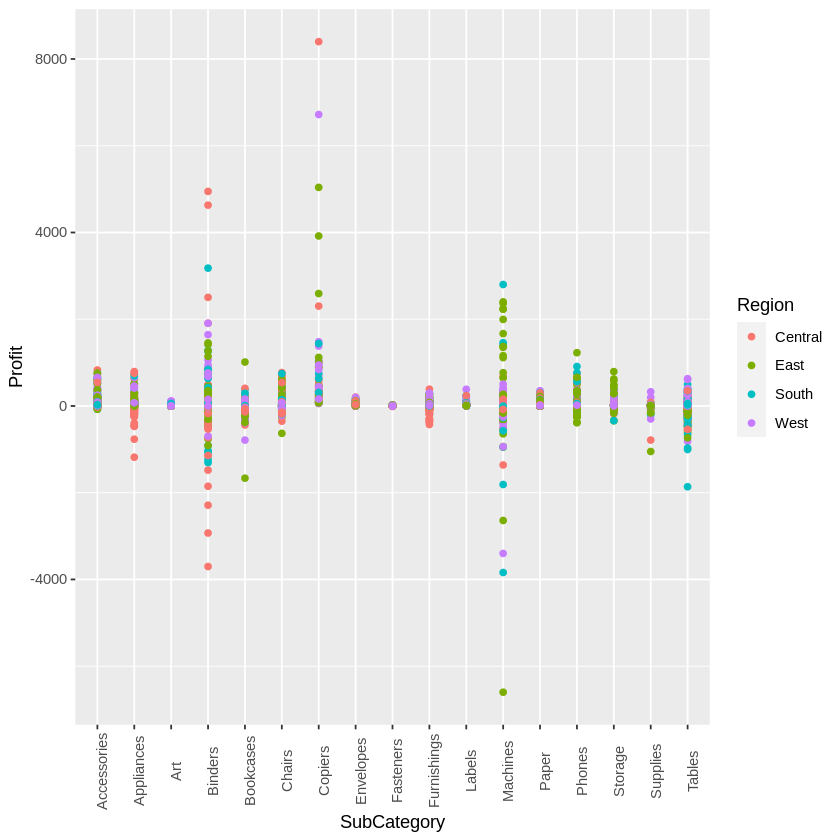

In [30]:
ggplot(data = superstore) +
  geom_point(mapping = aes(x = SubCategory, y = Profit, color = Region)) + theme(axis.text.x = element_text(angle = 90))

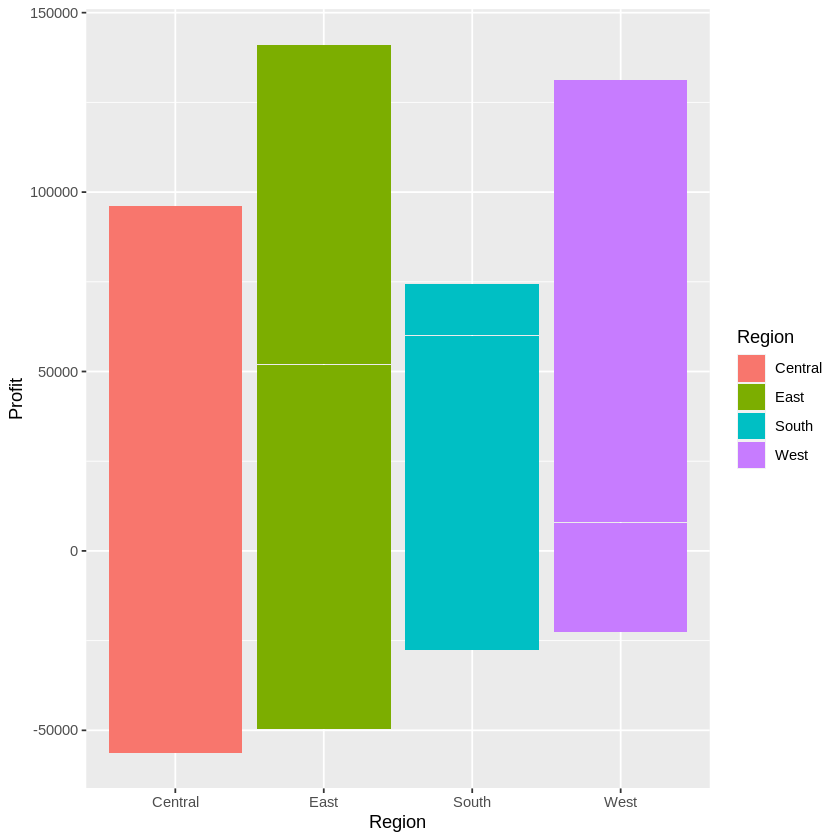

In [31]:
ggplot(superstore) +
    geom_col(mapping = aes(x = Region, y = Profit, fill=Region))

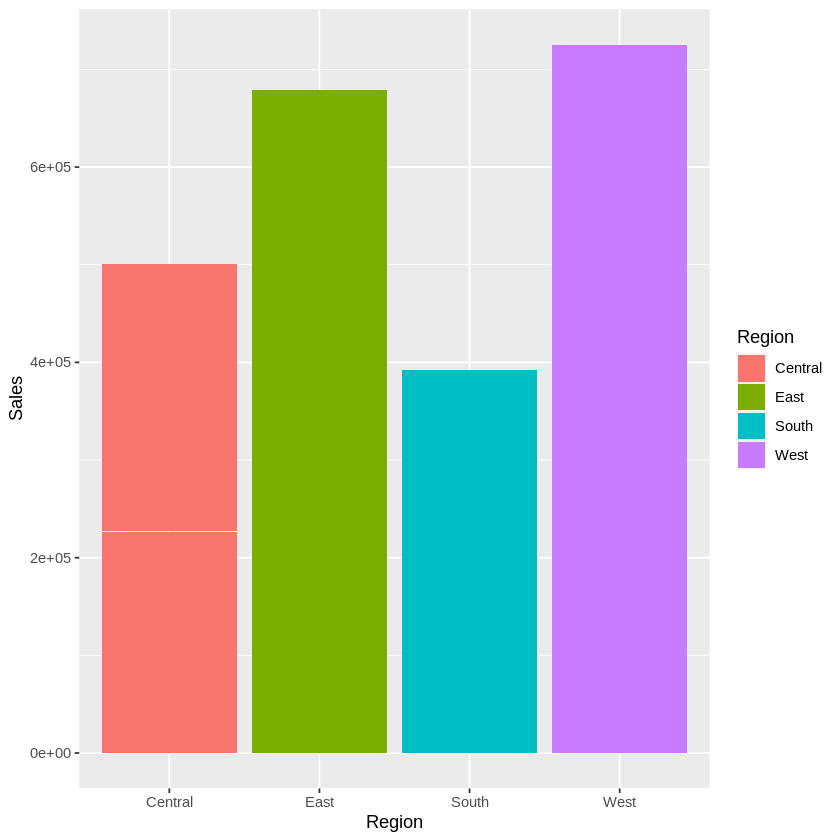

In [32]:
ggplot(superstore) +
    geom_col(mapping = aes(x = Region, y = Sales, fill=Region))

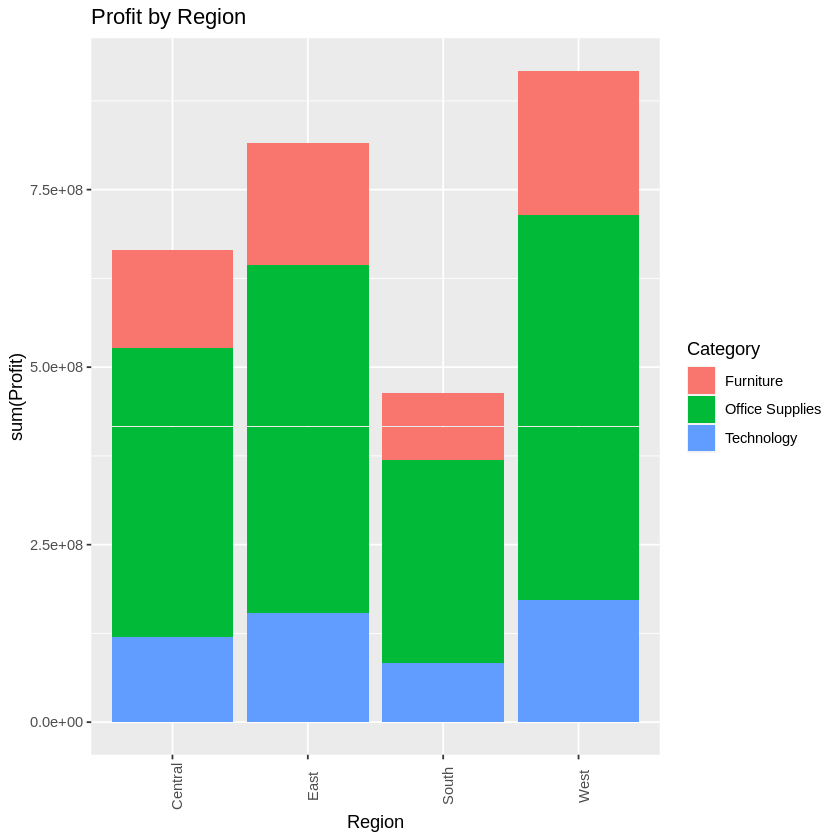

In [33]:
ggplot(superstore) +
  aes(
    x = Region,
    y = sum(Profit),
    fill = Category,
    group = Category
  ) +
  geom_col() +
  scale_fill_hue(direction = 1) +
  labs(title = "Profit by Region") +
  theme(axis.text.x = element_text(angle = 90))

1. ggplot(superstore): This line initializes the plot and specifies the dataset, "superstore," that contains the data we want to visualize.

2. aes(x = Region, y = sum(Profit), fill = Category, group = Category): Here, we define how the data will be mapped to the plot aesthetics. The x-axis will represent the "Region" variable, the y-axis will represent the sum of "Profit" for each region, and the "Category" variable will determine the fill color of the bars. The "group" aesthetic ensures that each category is grouped separately.

3. geom_col(): This function adds the columns (bars) to the plot. Each bar represents the sum of profits for a specific region and is colored based on the category.

4. scale_fill_hue(direction = 1): This line sets the color scale for the fill aesthetic (category) to a hue scale. The direction = 1 argument specifies that the colors will be arranged in a gradient from left to right.

5. labs(title = "Profit by Region"): This line sets the title of the plot to "Profit by Region."

6. theme(axis.text.x = element_text(angle = 90)): This line adjusts the appearance of the x-axis labels. The axis.text.x argument refers to the x-axis labels, and element_text(angle = 90) specifies that the labels will be rotated by 90 degrees to prevent overlap and improve readability.

In summary, this code creates a bar chart that shows the total profit for different categories in each region. The bars are colored based on the category, and the x-axis labels are rotated to improve readability. The resulting plot provides an overview of the profit distribution across different regions and categories.


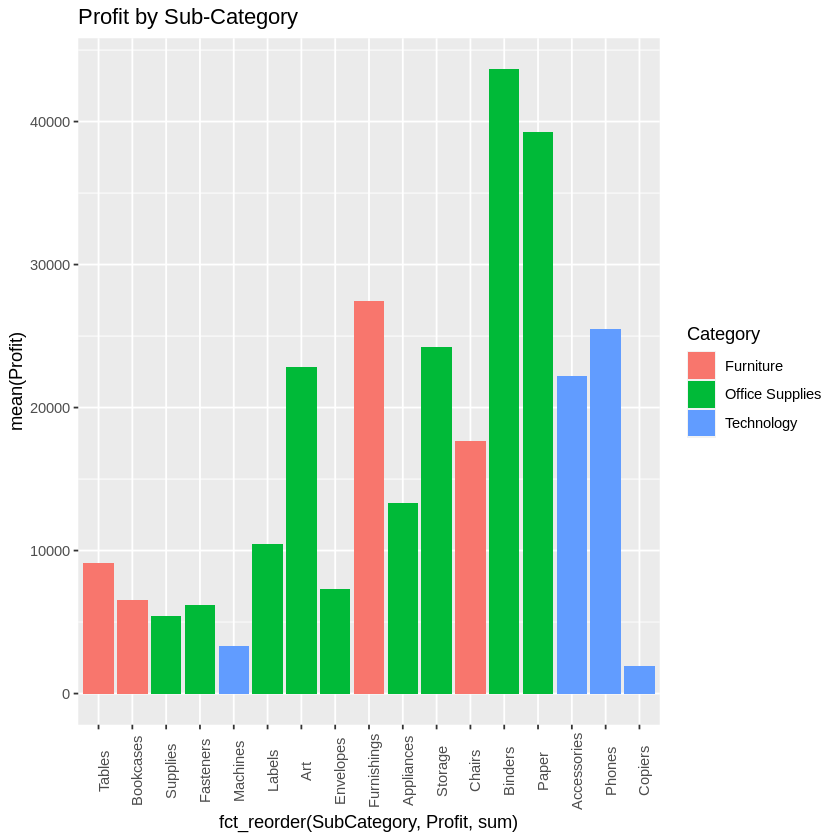

In [34]:
ggplot(superstore) +
  aes(
    x = fct_reorder(SubCategory, Profit, sum),
    y = mean(Profit),
    fill = Category,
    group = Category
  ) +
  geom_col() +
  scale_fill_hue(direction = 1) +
  labs(title = "Profit by Sub-Category") +
  theme(axis.text.x = element_text(angle = 90))

1. ggplot(superstore): This line initializes the plot and specifies the dataset, "superstore," that contains the data we want to visualize.

2. aes(x = fct_reorder(SubCategory, Profit, sum), y = mean(Profit), fill = Category, group = Category): Here, we define how the data will be mapped to the plot aesthetics.

3. The x-axis will represent the "SubCategory" variable, but with the order determined by the sum of "Profit" for each sub-category. The fct_reorder() function reorders the sub-categories based on their total profit.
The y-axis will represent the mean (average) of the "Profit" variable for each sub-category.
The "Category" variable will determine the fill color of the bars.
The "group" aesthetic ensures that each category is grouped separately.
geom_col(): This function adds the columns (bars) to the plot. Each bar represents the mean profit for a specific sub-category and is colored based on the category.

4. scale_fill_hue(direction = 1): This line sets the color scale for the fill aesthetic (category) to a hue scale. The direction = 1 argument specifies that the colors will be arranged in a gradient from left to right.

5. labs(title = "Profit by Sub-Category"): This line sets the title of the plot to "Profit by Sub-Category."

6. theme(axis.text.x = element_text(angle = 90)): This line adjusts the appearance of the x-axis labels. The axis.text.x argument refers to the x-axis labels, and element_text(angle = 90) specifies that the labels will be rotated by 90 degrees to prevent overlap and improve readability.

In summary, this code creates a bar chart that shows the average profit for different sub-categories in the "superstore" dataset. The sub-categories are ordered based on their total profit, and the bars are colored based on the category. The x-axis labels are rotated to improve readability. The resulting plot provides insights into the average profit distribution across different sub-categories and categories.

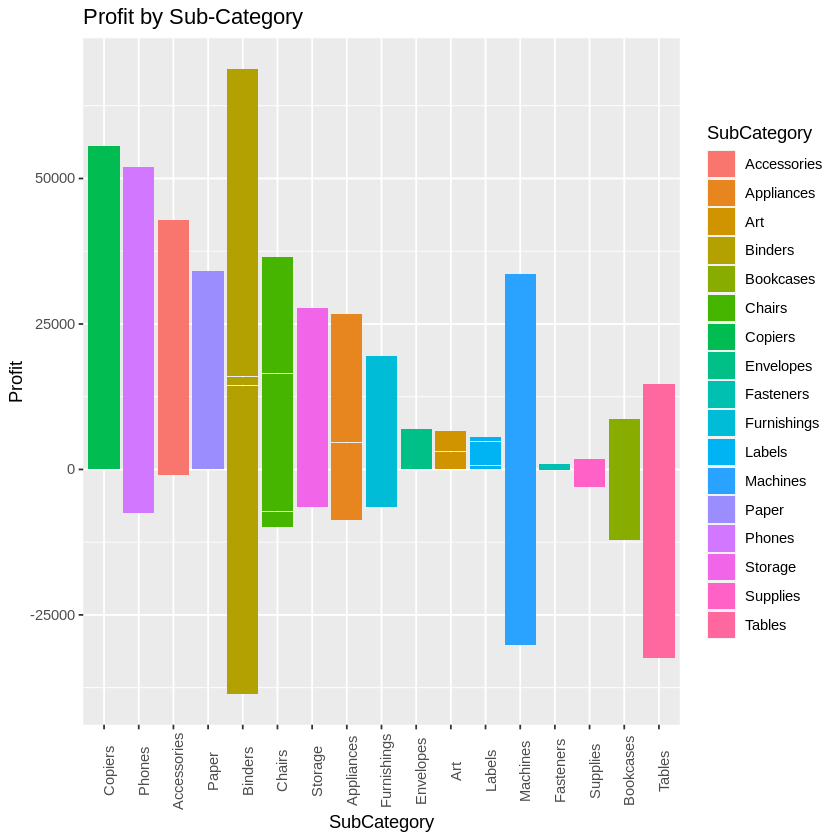

In [35]:
ggplot(superstore) +
    geom_col(mapping = aes(x = fct_reorder(SubCategory, -Profit, sum), y = Profit, fill = SubCategory)) +
    theme(axis.text.x = element_text(angle = 90)) + labs(title= "Profit by Sub-Category", x = "SubCategory", y = "Profit")

1. ggplot(superstore): This line initializes the plot and specifies the dataset, "superstore," that contains the data we want to visualize.

2. geom_col(mapping = aes(x = fct_reorder(SubCategory, -Profit, sum), y = Profit, fill = SubCategory)): This line adds the columns (bars) to the plot. The geom_col() function creates the bars, and the mapping argument specifies how the data is mapped to the aesthetics.

3. The x-axis is mapped to the "SubCategory" variable, but with the order determined by the negative sum of "Profit" for each sub-category. The fct_reorder() function reorders the sub-categories based on their total profit.
The y-axis represents the "Profit" variable.
The fill color of the bars is determined by the "SubCategory" variable.
theme(axis.text.x = element_text(angle = 90)): This line adjusts the appearance of the x-axis labels. The axis.text.x argument refers to the x-axis labels, and element_text(angle = 90) specifies that the labels will be rotated by 90 degrees to prevent overlap and improve readability.

4. labs(title = "Profit by Sub-Category", x = "SubCategory", y = "Profit"): This line sets the title of the plot to "Profit by Sub-Category," and it also labels the x-axis as "SubCategory" and the y-axis as "Profit."

In summary, this code creates a bar chart that shows the profit for different sub-categories in the "superstore" dataset. The sub-categories are ordered based on their total profit, with the highest profit at the top. Each bar represents the profit for a specific sub-category, and the bars are colored based on the sub-category. The x-axis labels are rotated to improve readability. The resulting plot provides insights into the profit distribution across different sub-categories.

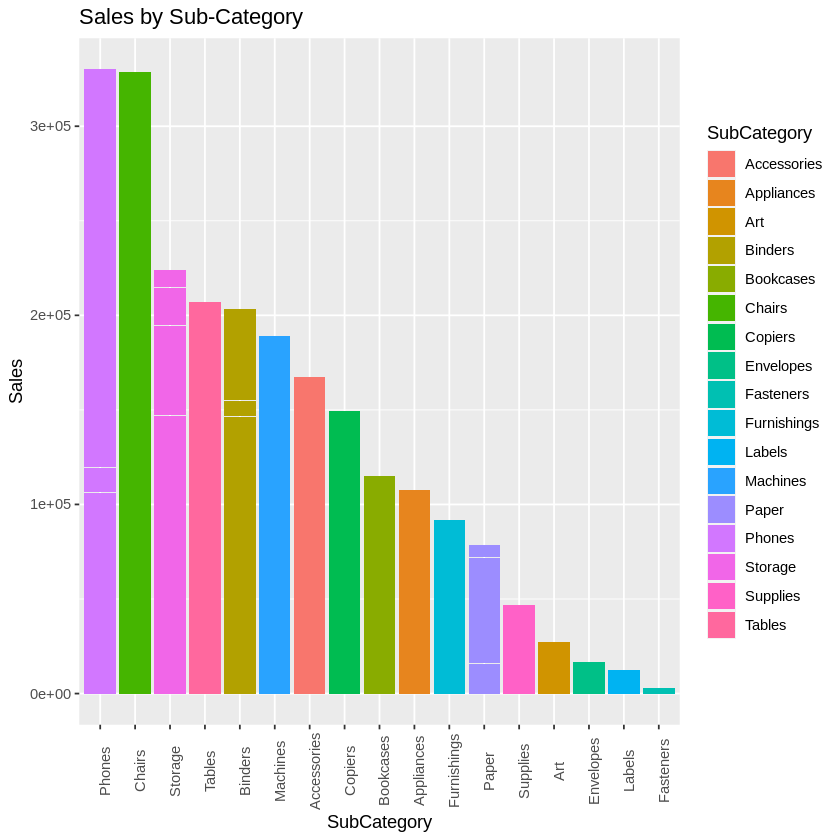

In [36]:
ggplot(superstore) +
    geom_col(mapping = aes(x = fct_reorder(SubCategory, -Sales, sum), y = Sales, fill = SubCategory)) +
    theme(axis.text.x = element_text(angle = 90)) + labs(title= "Sales by Sub-Category", x = "SubCategory", y = "Sales")

1. ggplot(superstore): This line initializes the plot and specifies the dataset, "superstore," that contains the data we want to visualize.

2. geom_col(mapping = aes(x = fct_reorder(SubCategory, -Sales, sum), y = Sales, fill = SubCategory)): This line adds the columns (bars) to the plot. The geom_col() function creates the bars, and the mapping argument specifies how the data is mapped to the aesthetics.

3. The x-axis is mapped to the "SubCategory" variable, but with the order determined by the negative sum of "Sales" for each sub-category. The fct_reorder() function reorders the sub-categories based on their total sales.
The y-axis represents the "Sales" variable.
The fill color of the bars is determined by the "SubCategory" variable.
theme(axis.text.x = element_text(angle = 90)): This line adjusts the appearance of the x-axis labels. The axis.text.x argument refers to the x-axis labels, and element_text(angle = 90) specifies that the labels will be rotated by 90 degrees to prevent overlap and improve readability.

4. labs(title = "Sales by Sub-Category", x = "SubCategory", y = "Sales"): This line sets the title of the plot to "Sales by Sub-Category," and it also labels the x-axis as "SubCategory" and the y-axis as "Sales."

In summary, this code creates a bar chart that shows the sales for different sub-categories in the "superstore" dataset. The sub-categories are ordered based on their total sales, with the highest sales at the top. Each bar represents the sales for a specific sub-category, and the bars are colored based on the sub-category. The x-axis labels are rotated to improve readability. The resulting plot provides insights into the sales distribution across different sub-categories.

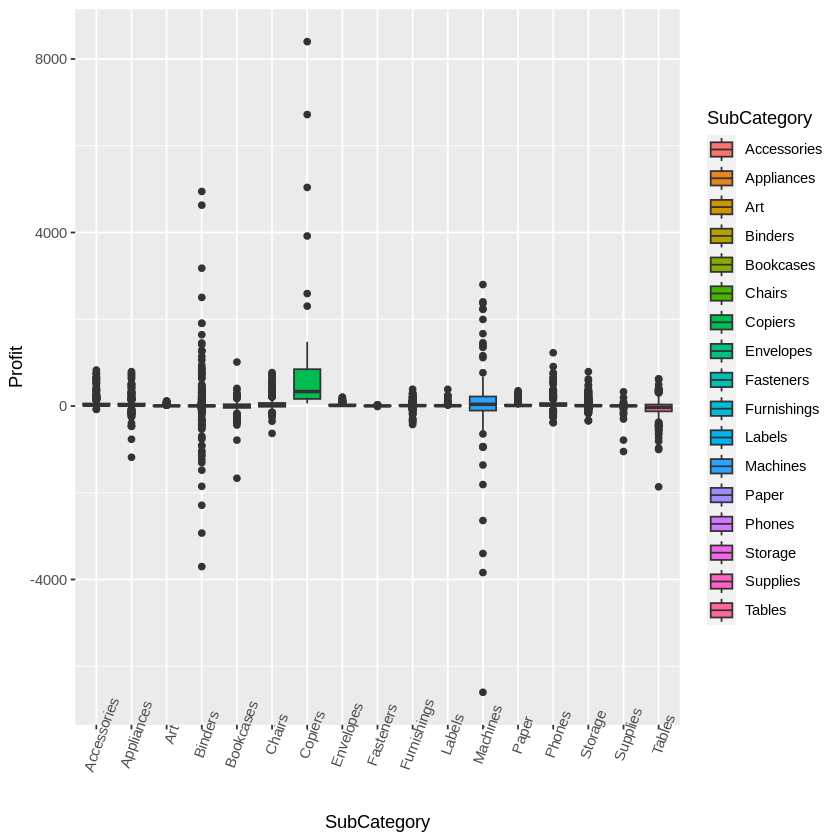

In [37]:
ggplot(data = superstore) +
    geom_boxplot(mapping = aes(x = SubCategory, y = Profit, fill = SubCategory)) +
    theme(axis.text.x  = element_text(angle = 70))

In [38]:
# Analysis Using SQL

sqldf('SELECT * FROM superstore LIMIT 5')

ShipMode,Segment,Country,City,State,Postal.Code,Region,Category,SubCategory,Sales,Quantity,Discount,Profit
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [39]:
print("Profits by Shipping Method")
sqldf('SELECT ShipMode, SUM(Profit) FROM superstore GROUP BY ShipMode ORDER BY SUM(Profit) DESC')

[1] "Profits by Shipping Method"


ShipMode,SUM(Profit)
<chr>,<dbl>
Standard Class,164085.82
Second Class,57446.64
First Class,48969.84
Same Day,15891.76


In [40]:
print('Profits by Region')
sqldf('SELECT Region, SUM(Profit) FROM superstore GROUP BY Region')

[1] "Profits by Region"


Region,SUM(Profit)
<chr>,<dbl>
Central,39704.36
East,91522.78
South,46749.43
West,108417.48


In [41]:
print("Profits by Category")
sqldf('SELECT Category, SUM(Profit) AS Profits FROM superstore GROUP BY Category ORDER BY SUM(Profit) DESC')
print("Sales, Profits, Discounts by SubCategory")
sqldf('SELECT SubCategory, SUM(Sales) AS Sales, SUM(Profit) AS Profits, SUM(Sales) - SUM(Profit) AS Loss, AVG(Discount)
AS Discounts FROM superstore GROUP BY SubCategory ORDER BY SUM(Profit) DESC')

[1] "Profits by Category"


Category,Profits
<chr>,<dbl>
Technology,145451.98
Office Supplies,122490.80
Furniture,18451.27


[1] "Sales, Profits, Discounts by SubCategory"


SubCategory,Sales,Profits,Loss,Discounts
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Copiers,149528.03,55617.8249,93910.205,0.16176471
Phones,330007.05,44513.7306,285493.323,0.15455568
Accessories,167380.32,41935.6649,125444.653,0.07845161
Paper,78479.21,34053.5693,44425.637,0.07489051
Binders,203412.73,30221.7633,173190.970,0.37229153
Chairs,328449.10,26590.1663,301858.937,0.17017828
Storage,223843.61,21278.8264,202564.782,0.07470449
Appliances,107532.16,18138.0054,89394.156,0.16652361
Furnishings,91705.16,13059.1436,78646.020,0.13834901


In [42]:
print("Cities with Highest Profits")
sqldf('SELECT City, State, SUM(Profit) FROM superstore GROUP BY City, State  ORDER BY SUM(Profit) DESC LIMIT 15')
print("Cities with Lowest Profits")
sqldf('SELECT City, State, SUM(Profit) FROM superstore GROUP BY City, State  ORDER BY SUM(Profit) LIMIT 15')

[1] "Cities with Highest Profits"


City,State,SUM(Profit)
<chr>,<chr>,<dbl>
New York City,New York,62036.984
Los Angeles,California,30439.787
Seattle,Washington,29156.097
San Francisco,California,17507.385
Detroit,Michigan,13181.791
Lafayette,Indiana,8976.097
Newark,Delaware,8086.172
Atlanta,Georgia,6993.663
Minneapolis,Minnesota,6824.585


[1] "Cities with Lowest Profits"


City,State,SUM(Profit)
<chr>,<chr>,<dbl>
Philadelphia,Pennsylvania,-13837.767
Houston,Texas,-10153.548
San Antonio,Texas,-7299.050
Lancaster,Ohio,-7149.618
Chicago,Illinois,-6654.569
Burlington,North Carolina,-5894.527
Louisville,Colorado,-3406.210
Dallas,Texas,-2846.526
Phoenix,Arizona,-2790.883


In [43]:
# What is going on, Philly?

sqldf('SELECT City, State, SubCategory, SUM(Sales), SUM(Profit) FROM superstore WHERE City = "Philadelphia" AND
 State = "Pennsylvania" GROUP BY SubCategory ORDER BY Profit ')

City,State,SubCategory,SUM(Sales),SUM(Profit)
<chr>,<chr>,<chr>,<dbl>,<dbl>
Philadelphia,Pennsylvania,Bookcases,4531.345,-2568.1413
Philadelphia,Pennsylvania,Tables,8052.186,-2588.7538
Philadelphia,Pennsylvania,Machines,2133.717,-2219.2456
Philadelphia,Pennsylvania,Supplies,6229.480,-1351.4897
Philadelphia,Pennsylvania,Phones,19432.182,-3555.0398
Philadelphia,Pennsylvania,Binders,4552.161,-3385.2340
Philadelphia,Pennsylvania,Chairs,17007.970,-1963.3730
Philadelphia,Pennsylvania,Envelopes,1024.224,351.4146
Philadelphia,Pennsylvania,Accessories,7277.552,895.1663


Initial Findings

1. Office Supplies Category has the least profits, specifically Bookcases and Tables, which also average the most discounts.

2. Recommend reducing discounts on Tables and Bookcases. Alternate: Remove from Inventory

3. Investigate cities with negative profits. Consider next steps in departments with negative profits

In [44]:
print("Discounts Vs. Profits")
sqldf('SELECT AVG(Discount) AS Discounts, COUNT(Discount) AS Number_of_Discounts, SUM(Profit) AS Profits
FROM superstore WHERE Discount > 0 GROUP BY Discount ORDER BY SUM(Profit)')

[1] "Discounts Vs. Profits"


Discounts,Number_of_Discounts,Profits
<dbl>,<int>,<dbl>
0.70,418,-40075.357
0.80,300,-30539.039
0.40,206,-23057.050
0.50,66,-20506.428
0.30,227,-10369.277
0.60,138,-5944.655
0.45,11,-2493.111
0.32,27,-2391.138
0.15,52,1418.992


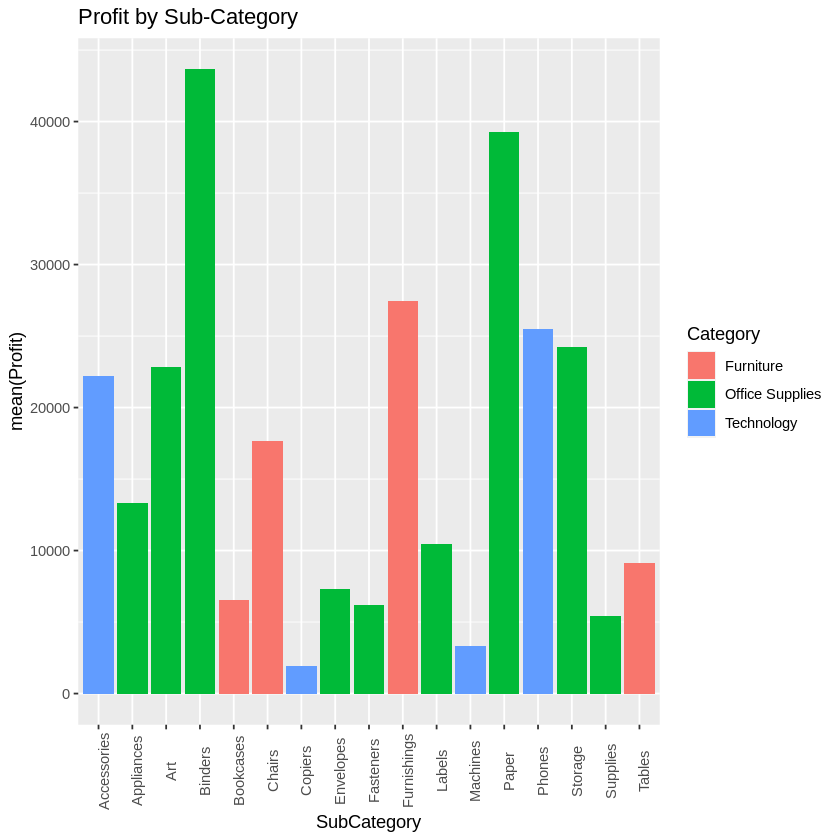

In [45]:
ggplot(superstore) +
  aes(
    x = SubCategory,
    y = mean(Profit),
    fill = Category,
    group = Category
  ) +
  geom_col() +
  scale_fill_hue(direction = 1) +
  labs(title = "Profit by Sub-Category") +
  theme(axis.text.x = element_text(angle = 90))

In [46]:
sqldf('SELECT City, State, SubCategory, profit, discount FROM superstore
where SubCategory = "Copiers" AND Discount >= 0.4 ')

City,State,SubCategory,Profit,Discount
<chr>,<chr>,<chr>,<dbl>,<dbl>
Cincinnati,Ohio,Copiers,69.9990,0.4
Columbus,Ohio,Copiers,191.9968,0.4
Columbus,Ohio,Copiers,109.9980,0.4
Philadelphia,Pennsylvania,Copiers,179.9964,0.4
Philadelphia,Pennsylvania,Copiers,1119.9968,0.4
Philadelphia,Pennsylvania,Copiers,69.9965,0.4
Philadelphia,Pennsylvania,Copiers,125.9972,0.4
Philadelphia,Pennsylvania,Copiers,239.9960,0.4
Bowling Green,Ohio,Copiers,74.9985,0.4


# Location and Sales Analysis

### Weakest Performing Locations

In [47]:
sqldf('SELECT State, Profit FROM superstore GROUP BY State ORDER BY Profit  LIMIT 10')

State,Profit
<chr>,<dbl>
Florida,-383.0310
Texas,-123.8580
Tennessee,-114.3912
Colorado,-26.8758
Oregon,-3.7880
Pennsylvania,-1.0196
Idaho,2.9372
Massachusetts,3.0996
Connecticut,3.4368


In [48]:
sqldf('SELECT City, State, Profit FROM superstore GROUP BY City, State ORDER BY Profit  LIMIT 10')

City,State,Profit
<chr>,<chr>,<dbl>
Burlington,North Carolina,-3839.9904
Bloomington,Illinois,-407.6820
Fort Lauderdale,Florida,-383.0310
Park Ridge,Illinois,-312.0614
Franklin,Massachusetts,-297.6848
Yonkers,New York,-264.9208
Buffalo Grove,Illinois,-184.8366
Champaign,Illinois,-182.3520
Dallas,Texas,-178.9668


##### Florida ranks as the weakest performing state with a profit of -$383.0310.

##### Similarly, Burlington, North Carolina emerges as the weakest performing city, reporting profits of -$3839.9904.

### Greatest Performing Locations

In [49]:
sqldf('SELECT State, Profit FROM superstore GROUP BY State ORDER BY Profit DESC  LIMIT 10')

State,Profit
<chr>,<dbl>
Montana,1379.9770
Mississippi,225.2640
Missouri,218.2518
Georgia,168.4384
Washington,132.5922
Maine,131.3550
Louisiana,131.0296
Arizona,111.3024
Wyoming,100.1960


In [50]:
sqldf('SELECT City, State, Profit FROM superstore GROUP BY City, State ORDER BY Profit DESC LIMIT 10')

City,State,Profit
<chr>,<chr>,<dbl>
Great Falls,Montana,1379.9770
Virginia Beach,Virginia,1276.4871
Jamestown,New York,1228.1787
Lakeville,Minnesota,580.5394
Beverly,Massachusetts,503.7822
Muskogee,Oklahoma,374.3792
Greenwood,Indiana,356.2250
Maple Grove,Minnesota,331.1910
Anaheim,California,310.9872


##### Montana stands out as the top-performing state with a profit of $1379.9700.

##### Arguably, the city of Great Falls, Montana emerges as the highest-performing city, also generating profits of $1379.9770


**Insights: **

1. **Data Cleaning and Renaming**: The dataset underwent a renaming process to make column names more consistent and user-friendly. For instance, "Sub.Category" was renamed to "SubCategory" and "Ship.Mode" to "ShipMode".


2. **Preliminary Analysis with Visualizations**:
The profit distribution across different product categories and regions was visualized. It was evident that certain categories and regions outperformed others in terms of profitability.
The sub-category wise profit distribution showcased the variability in profitability across different product sub-categories.
Boxplots provided insights into the spread and outliers of profits across sub-categories.

3. **SQL-based Analysis**:
The top and bottom-performing states and cities, in terms of profit, were identified. This granular analysis can guide strategic decisions for business expansion or intervention.
The relationship between discounts and profits was explored. This is crucial as excessive discounts can erode profit margins.
Specific queries were made to understand anomalies, like the significant discounts on "Copiers" and the performance of cities like Philadelphia.

4. **Location-based Insights** :
Weakest Performing Locations: States like Florida, Texas, and Tennessee were among the lowest in terms of profit. Cities like Burlington (North Carolina) and Bloomington (Illinois) also reported significant losses.
Greatest Performing Locations: Montana emerged as the top-performing state, with Great Falls (Montana) being the highest profit-generating city.

5. **Product-based Insights**:
The "Copiers" sub-category, when given high discounts (>= 40%), was specifically analyzed to understand its impact on profits.
Visualizations showcased the profit distribution across sub-categories, highlighting the variability in profitability.
Unique Observations: Montana, particularly the city of Great Falls, stood out in the analysis. Despite being a less populous state, it generated the highest profits, indicating a potential niche market or efficient sales strategies in that region.


In conclusion, the analysis provides a multi-faceted view of the superstore's performance. The insights derived can guide strategic decisions, from product placements to regional marketing strategies. Future work can delve deeper into factors influencing profitability, such as seasonal trends, customer demographics, or competitive landscape.









